# Part II - (Fordgobike tripdata  Explanatory Analysis )
### By (Emem Asuquo)

## Investigation Overview
For the presentation, my focus was on the ride duration and how other variables affect the duration  of the rides.
I started by plotting the distribution of the duration in minutes and found that the distribution has a long tail.
I used log transformation to plot the same distribution and discovered that there was a peak between 5 and 8 minutes, meaning that most of the rides took about 5 to 8 minutes. The average ride duration was 12 minutes and i also observed an  outlier 
which showed the maximum ride duration as 1424 minutes.

Investigating the hours of rides and the age group of members,I used seaborn to plot a countplot to group the ages, then I used seaborn catplot to plot the hourly rides per user type and age group.  
I found that the adult age group(30 to 50 years) had the highest number of trips between 8am to 9am and 4pm to 6pm on weekdays for both customers and subscribers.
The youth age group (19 to 30years) have the highest number of rides between 7pm and 11pm on weekdays for both customers and subscribers.

## Dataset Overview
The data contains information of 183,412 records of Fordgo bike trip in San Francisco. The dataset was made up of 16 columns and 183,412 rows. The columns are:
1. duration_sec
2. start_time
3. end_time
4. start_station_id
5. start_station_name
6. start_station_latitude
7. start_station_longitude
8. end_station_id
9. end_station_name
10. end_station_latitude
11. end_station_longitude
12. bike_id
13. user_type
14. member_birth_year
15. member_gender
16. bike_share_for_all_trip.
The data set was downloaded from the udacity website for this project.

In [85]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [86]:
# Load dataset into pandas
bike_df1=pd.read_csv('bike_df1.csv')
bike_df1.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_hour,start_day,start_month,duration_minutes
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,False,17,3,2,869.750000
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,False,18,3,2,708.683333
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,False,12,3,2,1030.900000
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,False,17,3,2,608.166667
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,True,23,3,2,26.416667


## Distribution of trip duration in minutes
The chart below shows the distribution of the main feature of interest which is the duration of the ride.

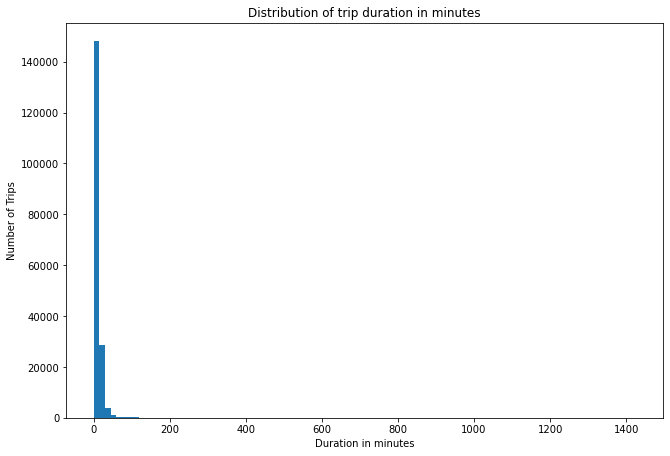

In [87]:
# A histogram to show the bike trip duration in minutes
binsize = 15
bins = np.arange(0, bike_df1['duration_minutes'].max()+binsize, binsize)

plt.figure(figsize=[10.69, 7.27])
plt.hist(data = bike_df1, x = 'duration_minutes', bins=bins)
plt.title('Distribution of trip duration in minutes')
plt.xlabel('Duration in minutes')
plt.ylabel('Number of Trips')
plt.show()

From the chart above, it can be seen that the highest number of trips is between 0 to 200 minutes. The chart does not really show the distribution properly,I had to perform. a log transformation for a better view of the distribution.

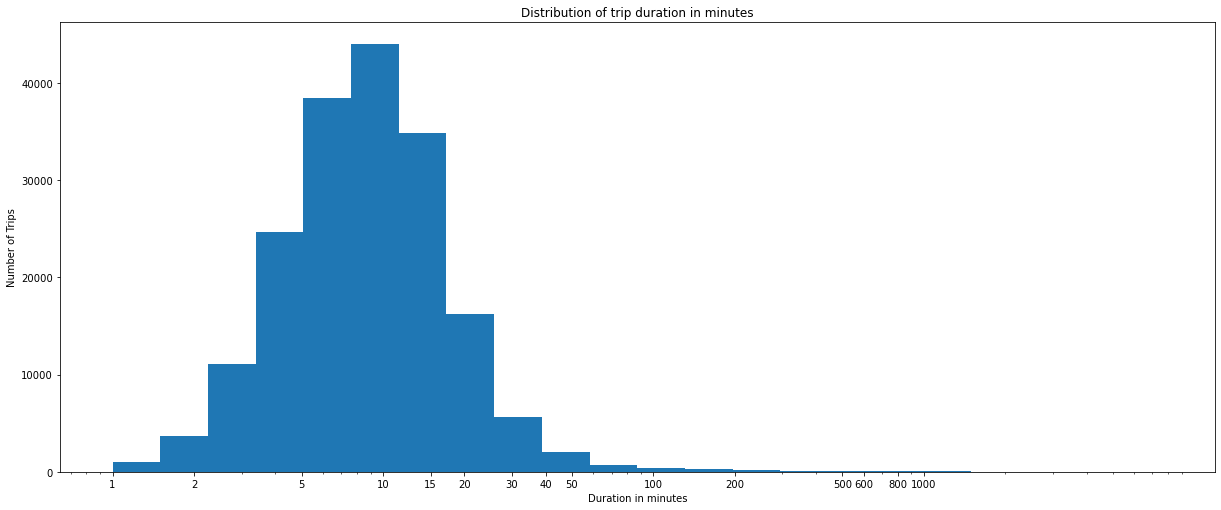

In [88]:
log_bin_size = 0.15
log_bins = 15 ** np.arange(0.0, np.log10(bike_df1['duration_minutes'].max())+log_bin_size, log_bin_size)

plt.figure(figsize=[20.69, 8.27])
plt.hist(data = bike_df1, x = 'duration_minutes', bins=log_bins)
plt.title('Distribution of trip duration in minutes')
plt.xlabel('Duration in minutes')
plt.ylabel('Number of Trips')
plt.xscale('log')
tick_locs=[1,2,5,10,15,20,30,40,50,100,200,500,600,800,1000]
plt.xticks(tick_locs, tick_locs)
plt.show()

In [89]:
bike_df1.duration_minutes.describe()

count    183412.000000
mean         12.101307
std          29.906496
min           1.016667
25%           5.416667
50%           8.566667
75%          13.266667
max        1424.066667
Name: duration_minutes, dtype: float64

Using log-scale to plot the previous graph shows that the distribution has a peak between 8 and 15 which means that most of the bike trip takes between 5 and 15 minutes. From the analysis, the average bike trip duration was 12 minutes.

## Trip duration by gender

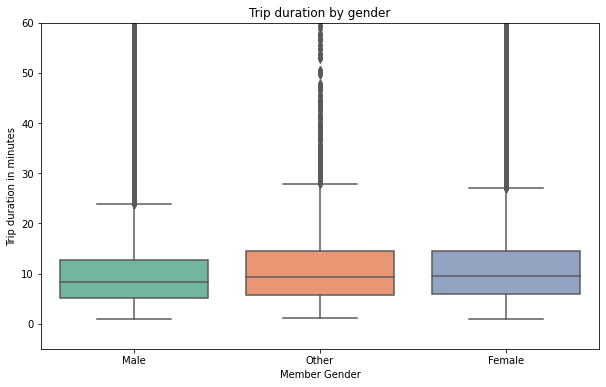

In [90]:
plt.figure(figsize =[10,6])
sns.boxplot(x = 'member_gender', y='duration_minutes', data = bike_df1, palette='Set2')
plt.ylim(-5, 60)
plt.title('Trip duration by gender')
plt.xlabel('Member Gender')
plt.ylabel('Trip duration in minutes')
plt.show()

I reduced the y axis(duration_minutes) to 60 minutes so we can have a better view of the plot. the plot shows that the female and other gender have trip duration that is slightly higher than the male gender.

## Distribution of the users
Lets investigate the number of customers per user type using a bar chart.

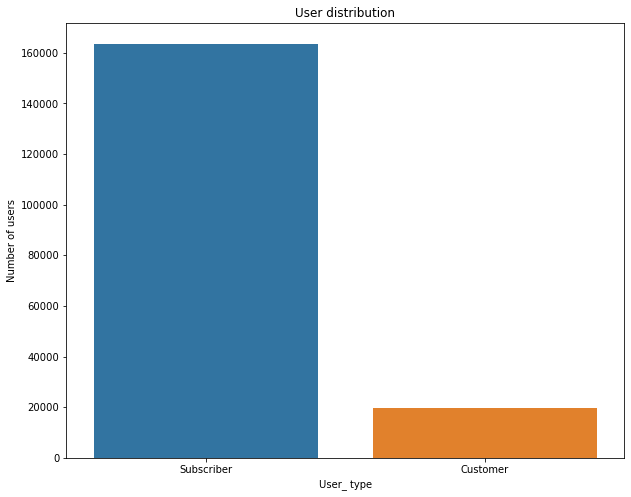

In [91]:
# Lets plot a bar chart to show the user type
plt.figure(figsize=[10,8])
user_category = bike_df1['user_type'].value_counts().index
sns.countplot(data = bike_df1, x = 'user_type', order = user_category)
plt.title('User distribution')
plt.xlabel('User_ type')
plt.ylabel('Number of users')
plt.show()

In [92]:
bike_df1.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

From the above, it can be seen that majority of the users are subscribers (163,544) while the remaining 19,868 users are customers. This means that 89.2% of users are subscribers, they use the bikes more than the customers, and 10.8% of users are customers.

## Trip duration by user type

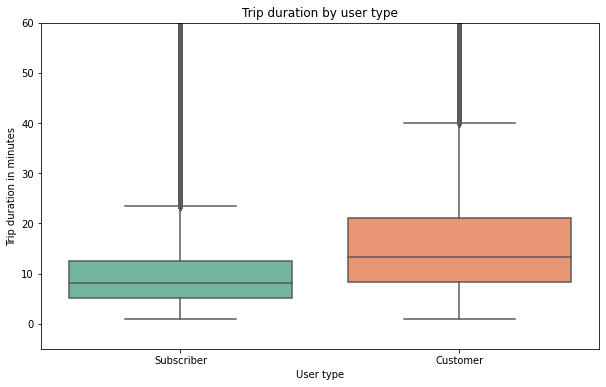

In [93]:
plt.figure(figsize =[10,6])
sns.boxplot(x = 'user_type', y='duration_minutes', data = bike_df1, palette='Set2', order = ['Subscriber', 'Customer'])
plt.ylim(-5, 60)
plt.title('Trip duration by user type')
plt.xlabel('User type')
plt.ylabel('Trip duration in minutes')
plt.show()

From the above plot, we can see that the customers use the bike for longer duration than the subscribers.

In [94]:
subscriber=bike_df1['user_type']=='Subscriber'
customer = bike_df1['user_type']=='Customer'

In [95]:
bike_df1[subscriber].duration_minutes.mean()

10.671061304603203

In [96]:
bike_df1[customer].duration_minutes.mean()

23.87441698543723

The analysis shows that the subscribers use the bike ride for an average of 10 minutes while the customers use the bike ride for an average of 23 minutes.

## Distribution of user type by age group
I would like to investigate which age group has more users in each of the user type. To achieve this, I will divide member_age into 4 age groups namely teenagers, youths and adults and Retirees

In [97]:
# To calculate the Age from the member_birth_year column.
#code
bike_df1['member_age']=2019-bike_df1['member_birth_year']
#Test
bike_df1.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_hour,start_day,start_month,duration_minutes,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984.0,Male,False,17,3,2,869.750000,35.0
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,2535,Customer,NaN,NaN,False,18,3,2,708.683333,NaN
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972.0,Male,False,12,3,2,1030.900000,47.0


In [98]:
# Age groupings
bike_df1['age_group']= bike_df1['member_age'].apply(lambda x: 'Teenagers' if 13<x<=19
else 'Youth' if 19<x<=30 
else 'Adult' if 30<x<=50 
else 'Senior Adult' if 50<x 
else x)

In [99]:
# Lets have the value counts of the age group.
bike_df1.age_group.value_counts()

Adult           85936
Youth           72643
Senior Adult    14856
Teenagers        1712
Name: age_group, dtype: int64

The above analysis shows that the bike service had fewer teenagers (age group between 13 and 19) and more of adults (age group between 30 and 50

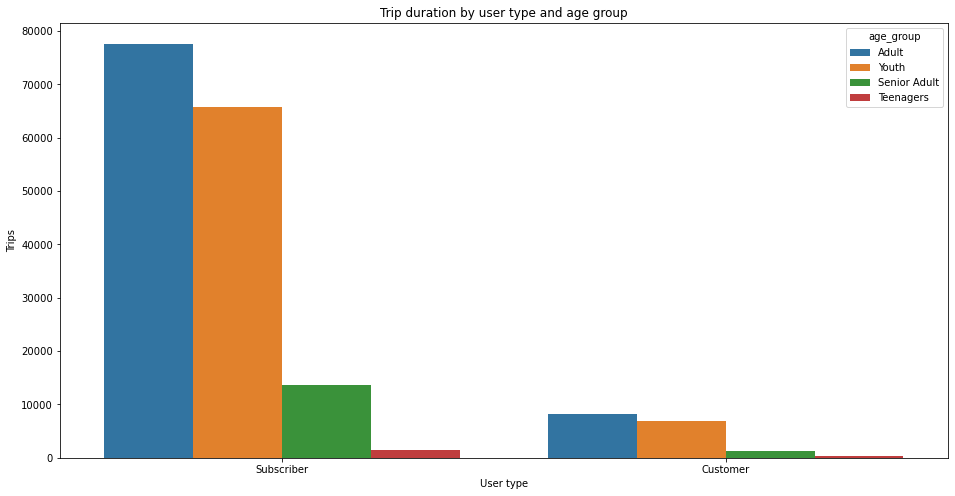

In [100]:
plt.figure(figsize=[35,8])
plt.subplot(1, 2, 1)
age_group_chart = sns.countplot(data=bike_df1, x = 'user_type', hue ='age_group', order = bike_df1.user_type.value_counts().index)
age_group_chart.set_xlabel('User type')
age_group_chart.set_title('Trip duration by user type and age group')
age_group_chart.set_ylabel('Trips');



From the above chart it can be observed that adults users are the most users in both user group while teenagers are the least users in both user groups.

## Distribution of duration in seconds based on user type and gender

<Figure size 1440x1080 with 0 Axes>

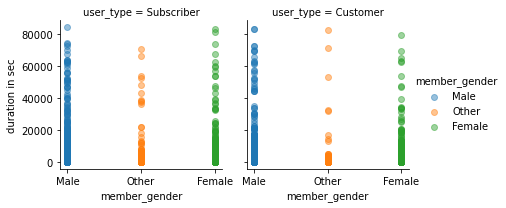

In [101]:
plt.figure(figsize =[20, 15])
chart1 = sns.FacetGrid(data= bike_df1, col = 'user_type', col_order = ['Subscriber', 'Customer'], hue = 'member_gender')
chart1.map_dataframe(plt.scatter, 'member_gender', 'duration_sec', alpha = 0.46)
chart1.set_axis_labels('member_gender', 'duration in sec')
chart1.add_legend()
plt.show()

From the plot above, the Customer and subscriber user types seem to behave the same way in their trip duration, apart from the other gender which has a slight difference in user type and trip duration.

## Hourly rides per user type and age group
Finally, Lets look at the number of rides in each hour of the day for user types and age groups.

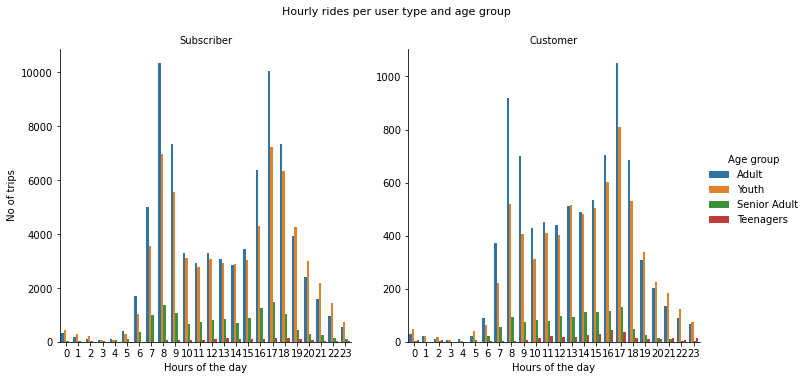

In [102]:
hourly_age_group = sns.catplot(data = bike_df1, x = 'start_hour', col = 'user_type', col_order=['Subscriber', 'Customer'], hue = 'age_group', kind = 'count', sharey = False)
hourly_age_group.set_axis_labels("Hours of the day", " No of trips")
hourly_age_group._legend.set_title("Age group")
hourly_age_group.set_titles("{col_name}")
hourly_age_group.fig.suptitle('Hourly rides per user type and age group', y = 1.05, fontsize = 11);

From the chart above, we can see that the trip gets higher from 8am which is when workers need to get to work with adult age group having the highest number of trips, there is also a peak at 5pm which is when workers return from work. It can also be observed thatfor both type of users (customers and subscribers) the adult age group still takes the highest rides. it can also be noticed that from 7pm the numbe of rides for youths gets higher than other age group for both customers and subscribers.

In [ ]:
!jupyter nbconvert Project_3_slide_deck_new.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Project_3_slide_deck_new.ipynb to slides
[NbConvertApp] Writing 736889 bytes to Project_3_slide_deck_new.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Project_3_slide_deck_new.slides.html
Use Control-C to stop this server
